## Aprendizagem Por Reforço
#### Importação das Bibliotecas

In [ ]:
import gym             # Importa a biblioteca gym, que é usada para criar e interagir com ambientes de simulação para o desenvolvimento e teste de algoritmos de aprendizado por reforço.
import random          # Importa o módulo random, que fornece funções para gerar números aleatórios e fazer escolhas aleatórias.
import numpy as np     # Importa a biblioteca numpy, renomeada como np para conveniência. Fornece suporte para arrays e funções matemáticas de alto desempenho.
from time import sleep # Importa a função sleep do módulo time, que permite pausar a execução do programa por um intervalo de tempo especificado.
from IPython.display import clear_output  # Importa a função clear_output do módulo IPython.display, que permite limpar a saída da célula no Jupyter Notebook para atualizar a visualização.

In [9]:
env = gym.make('Taxi-v3', render_mode='ansi')  # Cria o ambiente 'Taxi-v3' utilizando a biblioteca gym. O parâmetro 'render_mode' é configurado como 'ansi' para renderizar o ambiente em formato de texto (ANSI).

In [10]:
env.reset()         # Inicializa o ambiente e retorna o estado inicial.
print(env.render()) # Renderiza o ambiente em formato de texto (ANSI) e imprime a visualização do estado inicial.

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




In [11]:
# 0 = south 1 = north 2 = east 3 = west 4 = pickup 5 = dropoff  # Define a correspondência entre números e ações no ambiente.
print(env.action_space)      # Imprime o espaço de ações do ambiente, que define as ações possíveis que o agente pode tomar.
print(env.observation_space) # Imprime o espaço de observação do ambiente, que define os estados possíveis do ambiente.
print(len(env.P))            # Imprime o número total de estados possíveis no ambiente (taxi pode estar em 500 posições possíveis).
env.P[484]                   # Acessa e imprime a estrutura de transição de estado para o estado 484, que inclui informações sobre ações, probabilidades, estados seguintes, recompensas e se o estado é terminal.


Discrete(6)
Discrete(500)
500


{0: [(1.0, 484, -1, False)],
 1: [(1.0, 384, -1, False)],
 2: [(1.0, 484, -1, False)],
 3: [(1.0, 464, -1, False)],
 4: [(1.0, 484, -10, False)],
 5: [(1.0, 484, -10, False)]}

### Treinamento
#### Diferença temporal (Q-learning)

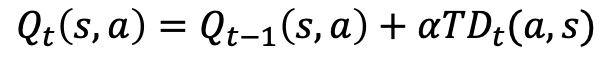

In [12]:
# Cria uma Q-table (tabela Q) inicializada com zeros, onde cada entrada representa a Q-value (valor-Q) para uma dada combinação de estado e ação.
q_table = np.zeros([env.observation_space.n, env.action_space.n]) 

# Imprime a forma (dimensões) da Q-table, que será (500, 6) no caso do ambiente 'Taxi-v3', indicando 500 estados e 6 ações possíveis.
q_table.shape 

(500, 6)

In [13]:
# A Q-table é uma matriz que representa os valores Q para cada par estado-ação.
# Cada linha representa um estado e cada coluna representa uma ação.
# Os valores Q indicam a utilidade esperada de executar uma determinada ação em um determinado estado.
# Como a Q-table foi inicializada com zeros, todos os valores Q são iguais a zero no início.
# Por exemplo, para o estado 0 (primeira linha) e ação 0 (primeira coluna), o valor Q é 0.0.
# Isso significa que a utilidade esperada de tomar a ação 0 no estado 0 é 0.0.
# A tabela completa seria muito grande para ser exibida aqui, mas você pode imaginar ela como uma matriz de 500x6, onde cada elemento é um valor Q.
q_table

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [14]:
# A divisão entre exploração e explotação, onde 10% das vezes ocorre exploração e 90% das vezes ocorre explotação.
# 1 - 10% 3 - 90%  

alpha = 0.1   # Taxa de aprendizado (alpha) usada na atualização da Q-table.
gamma = 0.6   # Fator de desconto (gamma) usado para ponderar recompensas futuras.
epsilon = 0.1 # Taxa de exploração (epsilon), que determina a probabilidade de escolher uma ação aleatória (exploração) em vez da melhor ação conhecida (exploração).

for i in range(100000):     # Loop de treinamento que executa 100.000 episódios.
    estado = env.reset()[0] # Reinicializa o ambiente e obtém o estado inicial.

    penalidades, recompensa = 0, 0  # Inicializa contadores de penalidades e recompensa.

    done = False  # Inicializa a variável de término do episódio.

    while not done:  # Loop até o episódio terminar.
        # Exploração
        if random.uniform(0, 1) < epsilon:   # Compara um número aleatório com epsilon para determinar se a exploração deve ocorrer.
            acao = env.action_space.sample() # Seleciona uma ação aleatória.
        # Exploitation
        else:
            acao = np.argmax(q_table[estado])  # Seleciona a melhor ação conhecida com base nos valores Q da Q-table.

        proximo_estado, recompensa, done, info, prob = env.step(acao)  # Executa a ação escolhida no ambiente e observa o próximo estado e recompensa.

        q_antigo = q_table[estado, acao]  # Obtém o valor Q atual para o par estado-ação.
        proximo_maximo = np.max(q_table[proximo_estado])  # Obtém o maior valor Q para o próximo estado.

        q_novo = (1 - alpha) * q_antigo + alpha * (recompensa + gamma * proximo_maximo)  # Calcula o novo valor Q usando a equação de atualização Q-learning.

        q_table[estado, acao] = q_novo  # Atualiza a Q-table com o novo valor Q.

        if recompensa == -10: # Verifica se ocorreu uma penalidade.
            penalidades += 1  # Incrementa o contador de penalidades.

        estado = proximo_estado # Atualiza o estado atual.

    if i % 100 == 0:  # A cada 100 episódios, limpa a saída e imprime o número do episódio atual.
        clear_output(wait=True)
        print('Episodio: ', i)

print('Treinamento Concluido')  # Imprime uma mensagem indicando que o treinamento foi concluído.

Episodio:  99900
Treinamento Concluido


### Avaliação

In [35]:
total_penalidades = 0 # Variável para armazenar o total de penalidades em todos os episódios.
episodios = 50        # Número de episódios para testar o agente.
frames = []           # Lista para armazenar os frames de renderização do ambiente.

for _ in range(episodios):          # Loop através dos episódios.
    estado = env.reset()[0]         # Reinicializa o ambiente e obtém o estado inicial.
    penalidades, recompensa = 0, 0  # Inicializa contadores de penalidades e recompensa.
    done = False                    # Inicializa a variável de término do episódio.

    while not done:    # Loop até o episódio terminar.
        acao = np.argmax(q_table[estado]) # Seleciona a melhor ação conhecida com base nos valores Q da Q-table.
        estado, recompensa, done, info, prob = env.step(acao) # Executa a ação escolhida no ambiente e observa o próximo estado e recompensa.

        if recompensa == -10: # Verifica se ocorreu uma penalidade.
            penalidades += 1  # Incrementa o contador de penalidades.

        frames.append({'frame': env.render(), # Adiciona o frame de renderização atual à lista de frames.
                       'state': estado,       # Adiciona o estado atual à lista de frames.
                       'action': acao,        # Adiciona a ação tomada à lista de frames.
                       'reward': recompensa}) # Adiciona a recompensa recebida à lista de frames.
    
total_penalidades += penalidades # Atualiza o total de penalidades.

print('Episodio:', episodios) # Imprime o número de episódios testados.
print('Penalidades:', total_penalidades) # Imprime o total de penalidades ocorridas em todos os episódios.

Episodio: 50
Penalidades: 0


In [41]:
for frame in frames:        # Loop pelos frames armazenados.
    clear_output(wait=True) # Limpa a saída para atualizar o frame.
    print(frame['frame'])   # Imprime o frame de renderização do ambiente.
    print('Estado:', frame['state']) # Imprime o estado correspondente ao frame.
    print('Ação:', frame['action'])  # Imprime a ação tomada no estado.
    print('Recompensa:', frame['reward']) # Imprime a recompensa recebida após a ação.
    sleep(0.2)                            # Espera um curto período de tempo antes de mostrar o próximo frame.

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Estado: 410
Ação: 5
Recompensa: 20
